# Algoritma <i>Clustering</i> dengan <i>K-Means</i>, <i>Hierarchical</i>, <i>DBSCAN</i>, <i>Fuzzy C-Means</i>, dan <i>Spectral Clustering</i> pada Data Kendaraan
Neni Nur Laili Ersela Zain (6002221001)

In [1]:
import pandas as pd

#Input data
vehicle_df = pd.read_csv('vehicle.csv').dropna()
#vehicle_df.shape
#vehicle_df.info()
vehicle_df.head() #Cuplikan data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [2]:
#Jumlah data per-kategori
pd.value_counts(vehicle_df['class'])

class
car    413
bus    205
van    195
Name: count, dtype: int64

<Axes: title={'center': 'Grafik Distribusi Tipe Kendaraan'}, xlabel='class'>

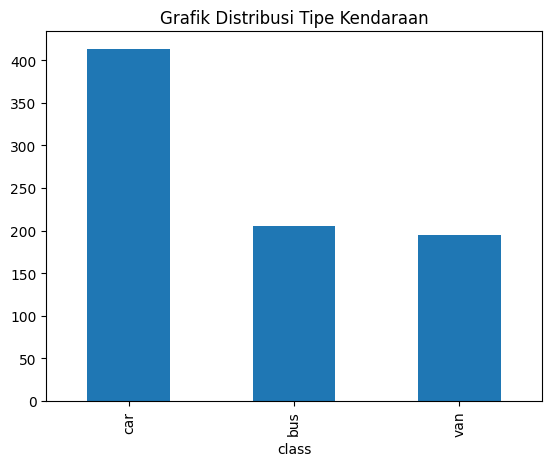

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
#Perbandingan tiap kategori
pd.value_counts(vehicle_df["class"]).plot(kind="bar",title="Grafik Distribusi Tipe Kendaraan")
#pd.value_counts(vehicle_df['class']).hist(bins=300)
#vehicle_df.isna().sum()

In [4]:
#Karena dimensi tidak pasti, maka dilakukan pembakuan data dengan Z-Score
vehicle_df_1 = vehicle_df.drop('class', axis=1)
from scipy.stats import zscore
#Pembakuan dengan Z-Score
vehicle_df_1_z = vehicle_df_1.apply(zscore)
#Tampilan setelah dibakukan
vehicle_df_1_z.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.163231,0.520408,0.060669,0.264970,1.283254,0.299721,-0.198517,0.129648,-0.217151,0.766312,-0.397397,-0.339014,0.301676,-0.321192,-0.071523,0.371287,-0.321809,0.171837
1,-0.322874,-0.619123,0.124067,-0.836393,-0.599253,0.085785,-0.591720,0.514333,-0.606014,-0.337462,-0.590034,-0.618754,-0.502972,-0.053505,0.538425,0.147109,0.003400,0.442318
2,1.256966,0.845988,1.518823,1.187734,0.530251,0.299721,1.162569,-1.152637,0.949438,0.697326,1.111591,1.122486,1.415804,0.080339,1.555006,-0.413338,-0.159204,0.036596
3,-0.079822,-0.619123,-0.002729,-0.300595,0.153750,0.085785,-0.742952,0.642562,-0.606014,-0.337462,-0.911095,-0.738643,-1.462359,-1.258099,-0.071523,-0.301249,1.629444,1.524243
4,-1.052030,-0.130753,-0.763506,1.068668,5.173770,9.285029,-0.591720,0.514333,-0.606014,-0.268476,1.689501,-0.647299,0.425468,7.307905,0.538425,-0.189159,-1.460039,-1.721531


## Pengerjaan dengan Algoritma <i>Kmeans</i>

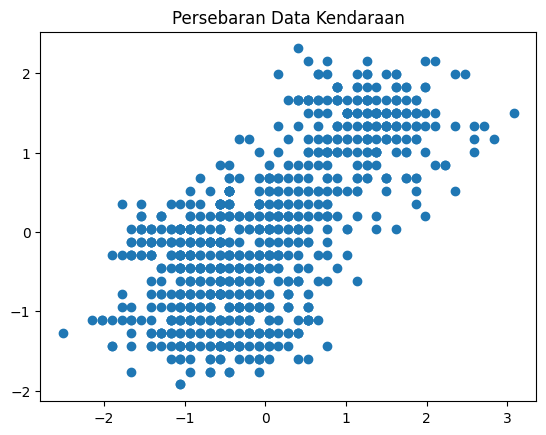

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_standard = sc.fit_transform(vehicle_df_1)
#Persebaran data sebelum di K-Means
plt.scatter(X_standard[:,0], X_standard[:,1])
plt.title("Persebaran Data Kendaraan")
plt.show()

Text(0.5, 1.0, 'Pemilihan Nilai k dengan Metode Elbow')

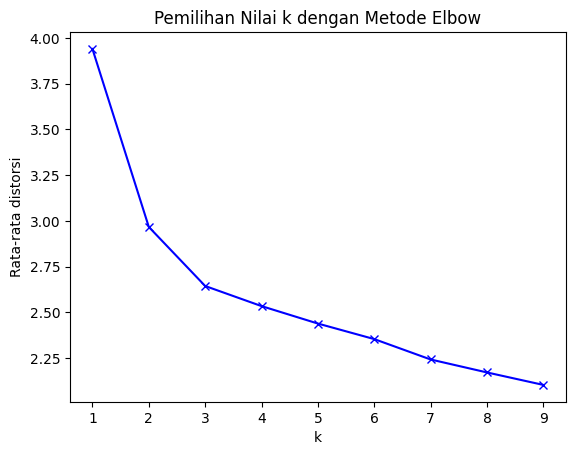

In [6]:
from sklearn.cluster import KMeans
#Mencari titik optimal dari data
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(X_standard)
    prediction=model.predict(X_standard)
    meanDistortions.append(sum(np.min(cdist(X_standard, model.cluster_centers_, 'euclidean'), axis=1)) / X_standard
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Rata-rata distorsi')
plt.title('Pemilihan Nilai k dengan Metode Elbow')

In [7]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)
kmeans.fit(X_standard)
#Nilai pusat dari data
centroids = kmeans.cluster_centers_
centroids

array([[ 1.13076532,  1.17094237,  1.19500584,  1.01909505,  0.21505188,
         0.34250798,  1.27180461, -1.19061224,  1.27548416,  1.09266768,
         1.22038121,  1.28132727,  1.07954232, -0.02879497,  0.16229031,
         0.26566456, -0.00535553,  0.18380067],
       [-0.91987072, -0.52009251, -0.89320752, -1.06435572, -0.50042171,
        -0.2190738 , -0.7791213 ,  0.86589322, -0.74535635, -0.484632  ,
        -0.78240328, -0.78341064, -0.38498232,  0.83878747, -0.09524349,
        -0.30171562, -1.05420601, -1.11069466],
       [-0.2339617 , -0.57387481, -0.30776905, -0.03041322,  0.2050726 ,
        -0.11653151, -0.45904181,  0.32506329, -0.48798836, -0.53604446,
        -0.41380935, -0.46366305, -0.60155031, -0.61924057, -0.06177969,
         0.01066762,  0.81278556,  0.69897299]])

In [8]:
#Menghitung centroid untuk kolom yang akan diprofilkan
centroid_df = pd.DataFrame(centroids, columns = list(X_standard) )
#Membuat Frame data baru (label) untuk menjadi variabel kategori
dataframe_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
dataframe_labels['labels'] = dataframe_labels['labels'].astype('category')
#Menggabungkan Frame label dengan Frame data
dataframe_labeled = vehicle_df_1.join(dataframe_labels)
#Penggabungan dengan Frame data untuk dikelompokkan
dataframe_analysis = (dataframe_labeled.groupby(['labels'] , axis=0)).head(1234)  
dataframe_analysis

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,labels
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,83,46.0,68.0,139.0,59.0,6,150.0,44.0,19.0,146,172.0,336.0,183.0,74.0,5.0,3.0,185.0,191,2
809,79,38.0,55.0,120.0,55.0,5,142.0,48.0,19.0,128,153.0,295.0,145.0,81.0,4.0,2.0,180.0,183,2
810,97,55.0,103.0,197.0,63.0,11,215.0,31.0,24.0,172,219.0,677.0,219.0,75.0,5.0,24.0,185.0,194,0
811,83,39.0,69.0,127.0,54.0,5,135.0,49.0,18.0,131,155.0,274.0,162.0,69.0,16.0,6.0,187.0,190,2


In [9]:
#label yang didapat
dataframe_labeled['labels'].value_counts() 

labels
2    297
0    251
1    232
Name: count, dtype: int64

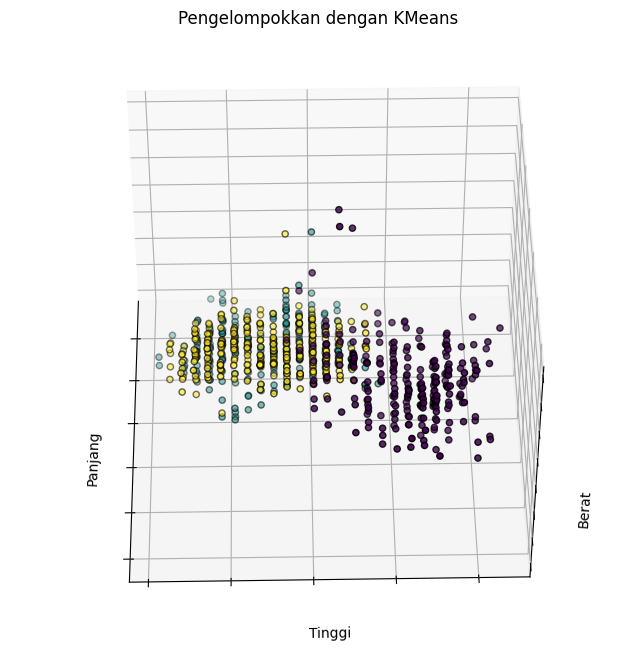

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

kmeans.fit(vehicle_df_1_z)
labels = kmeans.labels_
ax.scatter(vehicle_df_1_z.iloc[:, 0], vehicle_df_1_z.iloc[:, 1], vehicle_df_1_z.iloc[:, 3],c=labels.astype(np.float64), edgecolor='k')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel('Panjang')
ax.set_ylabel('Tinggi')
ax.set_zlabel('Berat')
ax.set_title('Pengelompokkan dengan KMeans')

for angle in range(0, 360):
    ax.view_init(45, angle)
    plt.draw()

In [11]:
#Percobaan untuk K = 4
final_model=KMeans(4)
final_model.fit(X_standard)

KMeans(n_clusters=4)

In [12]:
#Melakukan prediksi
prediction=final_model.predict(X_standard)
#vehicle_df.head()
vehicle_df["GROUP"] = prediction
print("Grup yang ditugaskan : ")
vehicle_df[["class", "GROUP"]]

Grup yang ditugaskan : 


,class,GROUP
0,van,0
1,van,2
2,car,1
3,van,2
4,bus,0
...,...,...
841,car,2
842,van,0
843,car,1
844,car,2


## Pengerjaan dengan <i>Hierarchical Clustering</i>

Gunakan <i>ward</i> sebagai Matriks <i>Linkage</i> dan jarak seperti <i>Eucledian</i>

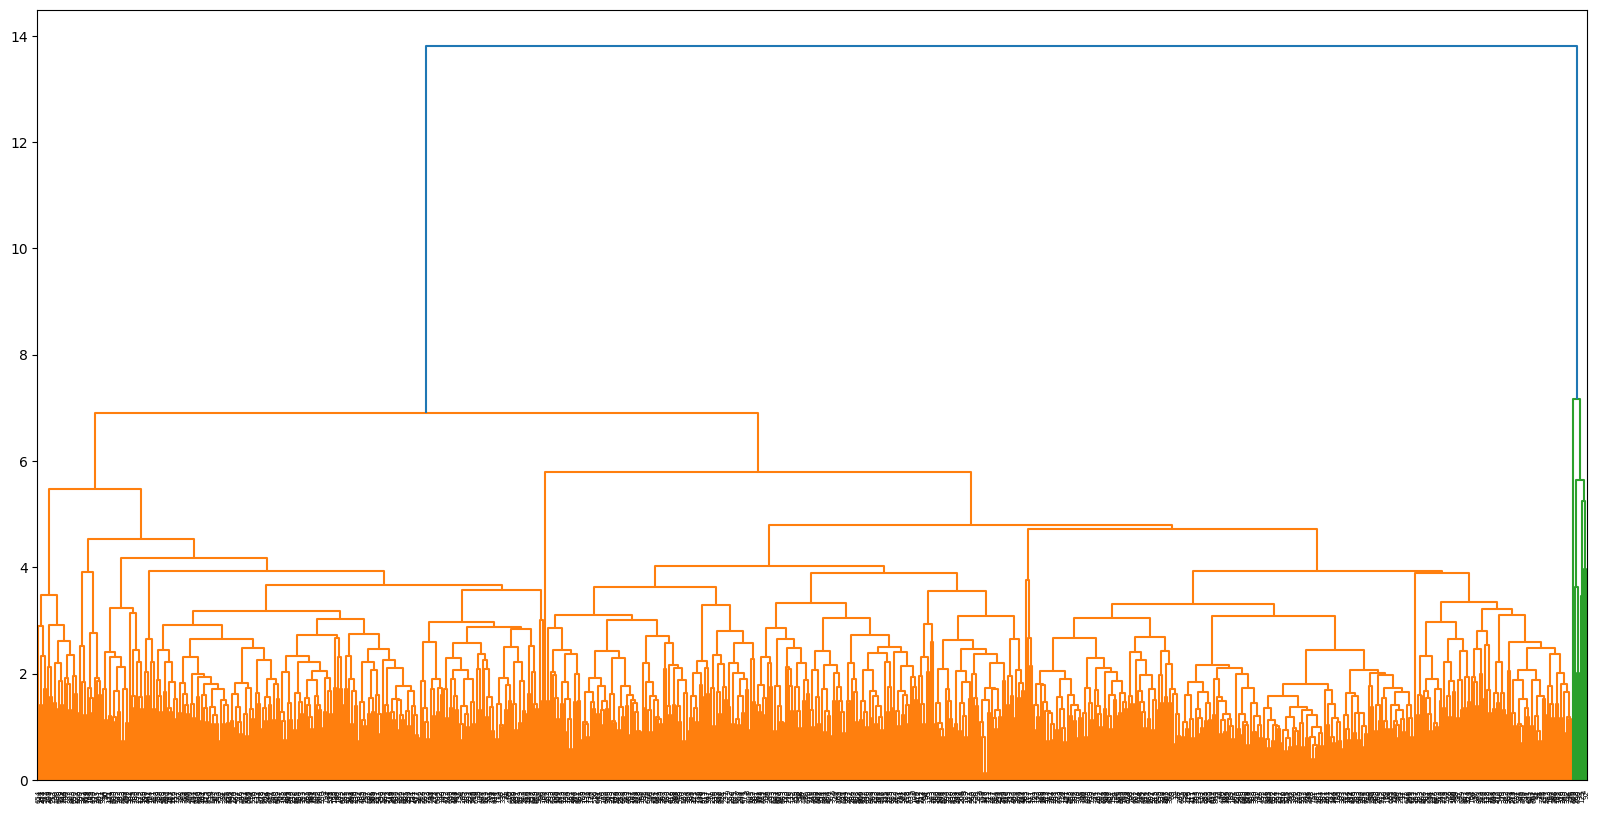

In [13]:
#Membuat Matriks Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
Z_df_average = linkage(X_standard, 'average', metric='euclidean')
#Z_df_average.shape
plt.figure(figsize=(20, 10))
dendrogram(Z_df_average)
plt.show()

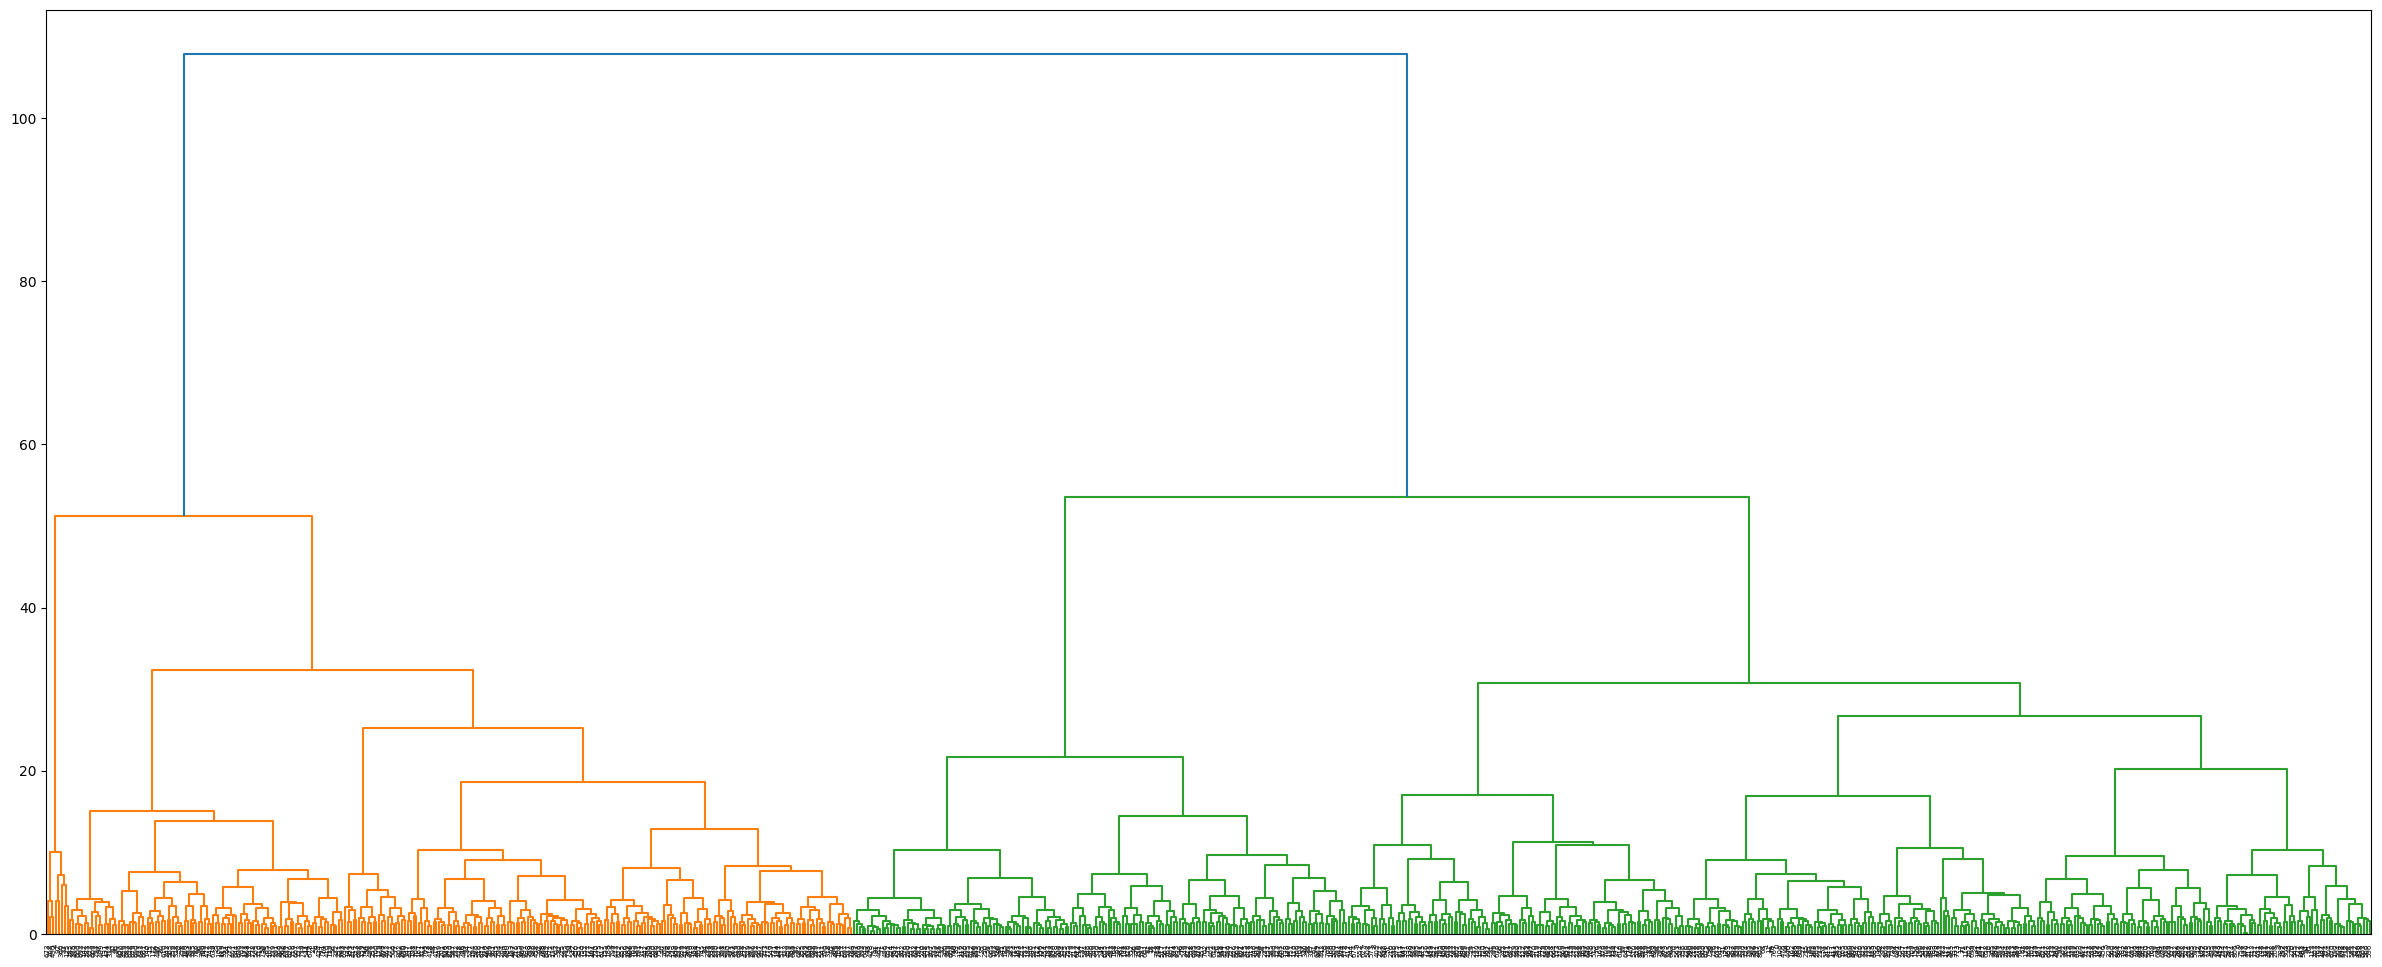

In [14]:
#Menentukan Z_df_ward
Z_df_ward = linkage(X_standard, 'ward', metric='euclidean')
Z_df_ward.shape
plt.figure(figsize=(30, 12))
dendrogram(Z_df_ward)
plt.show()

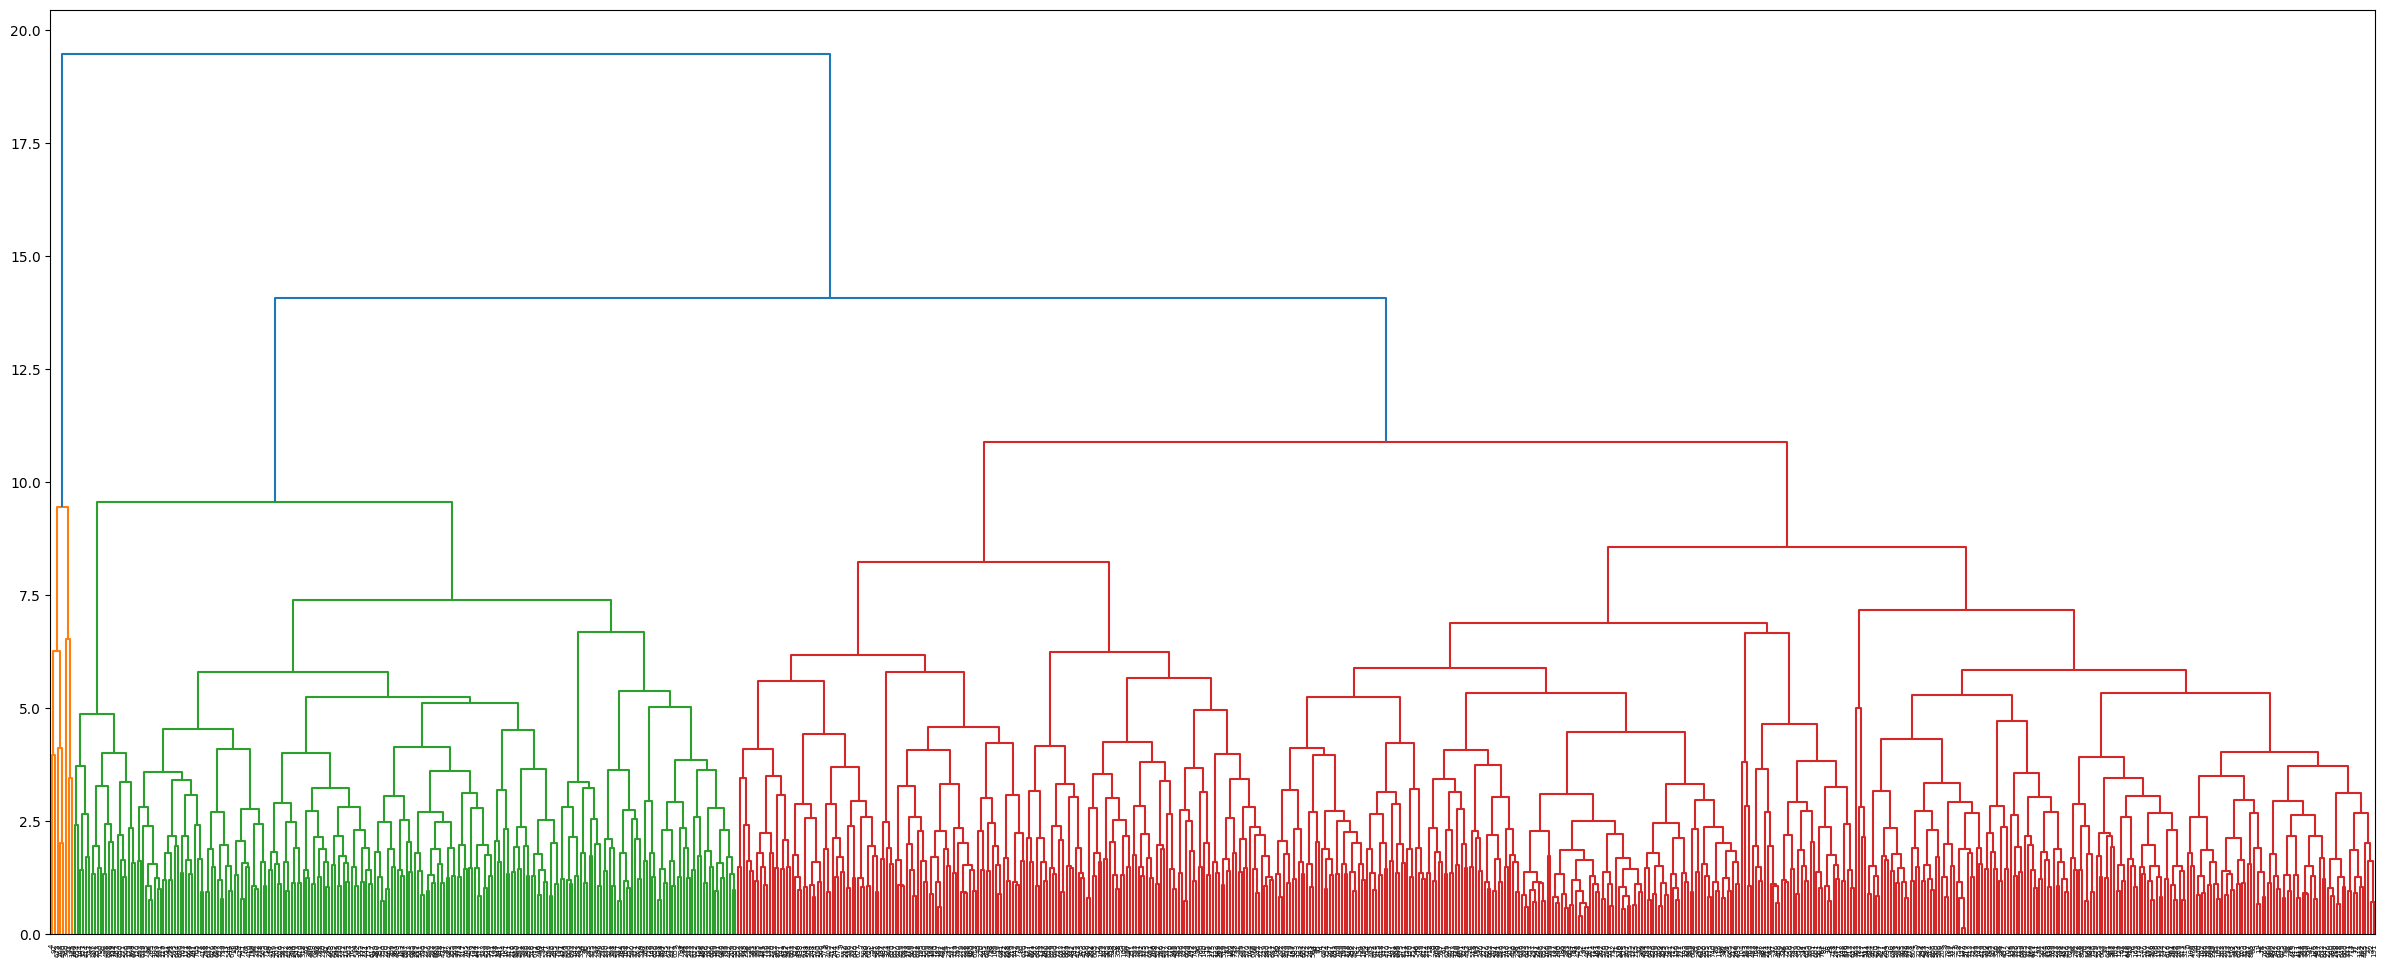

In [15]:
#Menentukan Z_df_complete
Z_df_complete = linkage(X_standard, 'complete', metric='euclidean')
Z_df_complete.shape
plt.figure(figsize=(30, 12))
dendrogram(Z_df_complete)
plt.show()

Membuat ulang dendrogram untuk 10 <i>cluster</i> terakhir yang digabungkan

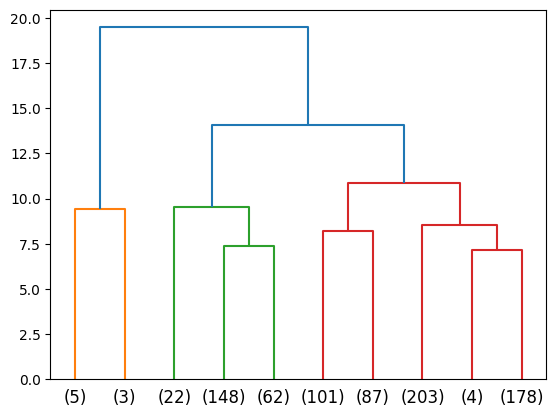

In [16]:
#Gunakan atribut truncate_mode='lastp' dalam fungsi dendrogram untuk sampai ke dendrogram
dendrogram(
    Z_df_complete,
    truncate_mode='lastp', 
    p=10,  #Menampilkan p kelompok terakhir yang digabungkan
)
plt.show()

In [17]:
max_distance = 15
from scipy.cluster.hierarchy import fcluster
hier_clusters = fcluster(Z_df_complete, max_distance, criterion='distance')
#hier_clusters
#len(set(hier_clusters))

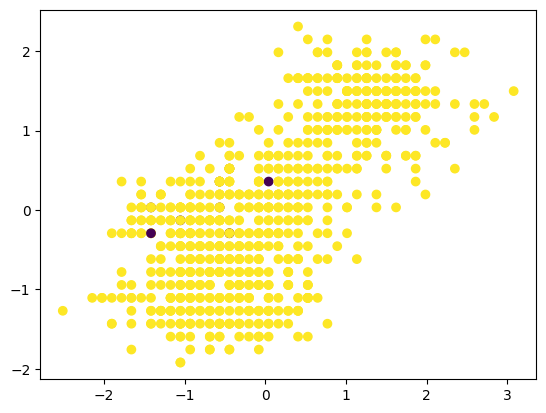

In [18]:
#Mencetak titik poin dengan warna berbada
plt.scatter(X_standard[:,0], X_standard[:,1], c=hier_clusters)
plt.show()

## Pengerjaan dengan Algoritma DBSCAN

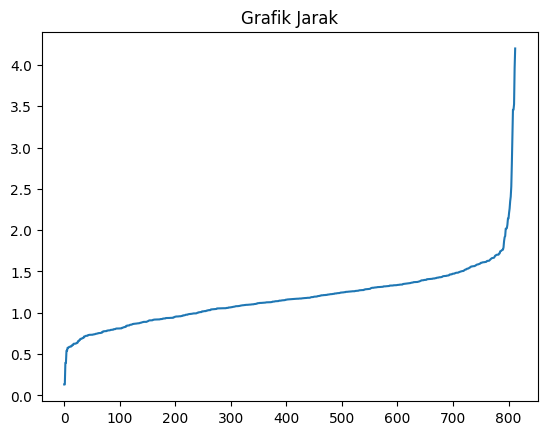

In [19]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.neighbors import NearestNeighbors
db_default = DBSCAN(eps = 0.0375, min_samples = 6).fit(X_standard)
labels = db_default.labels_
#list(set(labels))
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_standard)
distances, indices = nbrs.kneighbors(X_standard)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title("Grafik Jarak")
plt.plot(distances)

In [20]:
db_default = DBSCAN(eps=1.5, min_samples=10)
db_default.fit(X_standard)

DBSCAN(eps=1.5, min_samples=10)

In [21]:
#List kelompok
clusters = db_default.labels_
list(set(clusters))

[0, 1, 2, 3, -1]

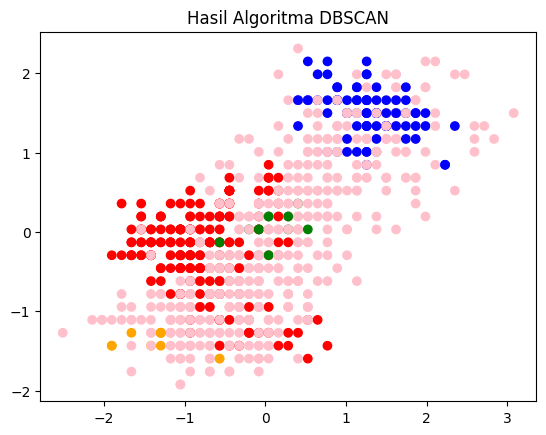

In [22]:
#Menampilkan hasil pengelompokan
colors = ['blue', 'red', 'orange', 'green', 'purple', 'black', 'brown', 'cyan', 'yellow', 'pink']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
plt.title("Hasil Algoritma DBSCAN")
plt.scatter(X_standard[:,0], X_standard[:,1], c=vectorizer(clusters))

## Pengerjaan dengan <i>Fuzzy C-Means</i>

In [23]:
import skfuzzy as fuzz
import seaborn as sns

%matplotlib inline
color_pallete = ['r','m','y','c', 'brown', 'orange','m','k', 'gray','purple','seagreen']
cluster_centers = [[1, 1],
                   [2, 4],
                   [5, 8]]
sigmas = [[0.5, 0.6],
          [0.4, 0.5],
          [0.1, 0.6]]

ModuleNotFoundError: No module named 'skfuzzy'

In [ ]:
#Membangkitkan data tes
np.random.seed(5)  
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(cluster_centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(500) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(500) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(500) * i))

In [ ]:
#Menampilkan data tes
fig0, ax0 = plt.subplots()
for label in range(5):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.')
ax0.set_title('Data dengan 500 titik.')
plt.show()

In [ ]:
#Membuat loop dan Plot
fig1, axes1 = plt.subplots(3, 3, figsize=(10, 10))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    #Penyimpanan nilai fpc
    fpcs.append(fpc)

    #Plot cluster yang ditugaskan, untuk setiap titik data dalam set pelatihan
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=color_pallete[j])

    #Tandai pusat setiap cluster fuzzy
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('cluster_centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc), size=12)
    ax.axis('off')

fig1.tight_layout()

In [ ]:
#menampilkan jumlah cluster yang mengubah FPC
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs, color='#731810')
ax2.set_title("Jumlah Cluster yang Mengubah FPC")
ax2.set_xlabel("Jumlah Pusat Cluster")
ax2.set_ylabel("Koefisien Partisi Fuzzy")
plt.show()

In [ ]:
#Input data kendaraan tanpa keterangan tipe
data = pd.read_csv('vehicle_no_type.csv')
data = data.dropna()
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

In [ ]:
#Prediksi compacteness dan circularity kendaraan
pred = kmeans.predict(data)
frame = pd.DataFrame(data)
frame['cluster'] = pred

color=['red','blue','orange', 'brown', 'green']
for k in range(0,5):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["compactness"],data["circularity"],c=color[k])
    plt.title("Persebaran Data Compacteness dan Circularity")
plt.show()

## Pengerjaan dengan <i>Spectral Clustering</i>

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from numpy import random
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances

import networkx as nx
import seaborn as sns
data, clusters = make_circles(n_samples=2000, noise=.01, factor=.3, random_state=5)
plt.title("Tampilan Awal Data Compacteness dan Circularity")
plt.scatter(data[:,0], data[:,1])

In [ ]:
#Pengaerjaan dengan K-Means
kmeans = KMeans(init='k-means++', n_clusters=2)
km_clustering = kmeans.fit(data)
plt.title("Hasil Pengerjaan dengan K-Means")
plt.scatter(data[:,0], data[:,1], c=km_clustering.labels_, cmap='prism', alpha=0.5, edgecolors='g')

In [ ]:
#Mencari Affinity dengan Nearest Neighbors
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=5)
sc_clustering = spectral.fit(data)
plt.title("Hasil Spectral dengan Affinity Ketetanggaan Terdekat")
plt.scatter(data[:,0], data[:,1], c=sc_clustering.labels_, cmap='prism', alpha=0.5, edgecolors='g')

In [ ]:
#Spectral Clustering dengan Affinity RBF
spectral = SpectralClustering(n_clusters=2, affinity='rbf', random_state=5)
sc_clustering = spectral.fit(data)
plt.title("Hasil Spectral dengan Affinity RBF")
plt.scatter(data[:,0], data[:,1], c=sc_clustering.labels_, cmap='prism', alpha=0.5, edgecolors='g')